# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки для дальнейшей работы, затем прочитаем файл /datasets/real_estate_data.csv и сохраним его в переменной data.

In [1]:
# импорт библиотеки pandas
import pandas as pd 
# импортируем библиотек matplotlib.pyplot, colors
import matplotlib.pyplot as plt
from matplotlib import colors
data=pd.read_csv('/datasets/real_estate_data.csv') # чтение файла с данными с сохранением в data

Для знакомства данными, выведем на экран первые 5 строк таблицы.

In [2]:
data.head() #Получение первых 5 строк таблицы.

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Вывод первых 5строк показал,что данные выгружены в одну строку через разделитель \t. !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!СТРОКУ
Перезапишем таблицу data используя в методе read_csv параметр разделителя sep='\t', затем выведем первые 10 строк таблицы.

In [3]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Не все столбцы из 22 отображаются на эране, выведем поочередно, первые 13, а затем остальные.

In [4]:
data[data.columns[0:13]].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0


In [5]:
data[data.columns[13:]].head()

,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица имеет 22 колонки, а именно:
 
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Получим общую информацию о данных таблицы используя метод info().

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.

### Вывод

При знакомстве с таблицой бросается в глаза,
11 столбцов имеют пустые значения, а именно:
* ceiling_height 
* is_apartment 
* living_area
* kitchen_area 
* balcony
* airports_nearest
* cityCenters_nearest
* parks_around3000 
* parks_nearest 
* ponds_around3000
* ponds_nearest
* days_exposition
* locality_name 

Следующие столбцы имеют тип данных с плавающей точкой float64 вместо целочисленного int64.

* floors_total — всего этажей в доме, 
* balcony — число балконов, 
* parks_around3000 — число парков в радиусе 3 км, 
* ponds_around3000 — число водоёмов в радиусе 3 км, 
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)

Столбец название населённого пункта 'locality_name' необходимо привести к одному регистру букв, а также заменить букву "ё" на "е", т.к. все это может давать дублирующие значения.

Столбец дата публикации 'first_day_exposition' имеет формат данных - дата со временем. Время не является информативным, т.к. судя по названию, столбец должен отображать информацию о дате, к тому же вместо значений времени указаны "0". Необходимо  привести данные к сокращенному виду, оставить только дату.

Предстоит серьезная работа по предобработке данных.

### Шаг 2. Предобработка данных

#### Определим порядок действий для предобработки данных таблицы.
* 2.1. Подсчитаем количество пропущенных значений.
* 2.1.1.Найдем "мусорные" строки, те строки где отсутствует большое количество значений. Подсчитаем количество таких строк и при необходимости удалим.

* 2.2. Проверка/удаление дубликатов.

* 2.2.1 Проверим могут ли давать дубликаты, разный регистр написания насленных пунктов.
* 2.2.2 Проверим могут ли давать дубликаты, разное написание в наименованиях насленных пунктов букв "ё" и "е".

* 2.3. Выдвинем несколько гипотез относительно пропущенных значениях в столбцах.  

* 2.3.1 Заполним пропуски в столбце высота потолков, в домах, которые находятся в одном населенном пунке, имеют одинаковую этажность, равно удалены от аэропорта и центра города. Предположим, что это один и тот же дом или типовой(одной серии).

* 2.3.2 Заполним пропуски в столбце всего этажей. Докажем, что дома в одном населенном пункте, равноудаленные от аэропортов, своих центров и локаций пруд или парк, имеют одинаковую этажность, а следовательно это один и тот же дом. Если мы это докажем, то мы сможем заполнить пропуски в столбце floors_total.

* 2.3.3 Предположим, что если в строках таблицы мы найдем уникальные строки, дома которых имеют одинаковую этажность, равноудалены от своих центров и  от аэропорта, при этом равноудалены от парка или пруда, то эти дома из одного населенного пункта.Если мы это докажем, то это позволит нам заполнить пустые значения в столбце locality_name.

* 2.3.4 Заполним пропуски в столбце ponds_around3000. Пропущенные значения в столбце ponds_around3000 — число водоёмов в радиусе 3 км могут иметь пустое значение, т.к. прудов в конкретном населенном пункте может не быть. 

* 2.3.5  Заполним пропуски в столбце parks_around3000. Пропущенные значения в столбце parks_arond3000 — число парков в радиусе 3 км могут иметь пустое значение, т.к. парков в конкретном населенном пункте может не быть.

* 2.3.6 Заполним пропуски столбцов  столбцы parks_nearest и ponds_nearest.

* 2.3.7 Заполним пропуски в столбце 'cityCenters_nearest' по среднему значению для каждого из населенного пункта.

* 2.3.8 Заполним пропуски в столбце 'airports_nearest' по среднему значению для каждого из населенного пункта.

* 2.3.9 Заполним пропуски в столбце 'balcony'. В столбце balcony — число балконов, пропущенные значения могут означать, что их нет.

* 2.3.10 Заполним пропуски в столбце kitchen_area — площадь кухни в квадратных метрах (м²). 

* 2.3.11 Заполним пропуски в столбце living_area —  жилая площадь в квадратных метрах(м²)

* 2.3.12 Заполним пропущенные значения столбца days_exposition - сколько дней было размещено объявление (от публикации до снятия)

* 2.4 Столбец дата публикации 'first_day_exposition' имеет формат данных - дата со временем. Время не является информативным, т.к. судя по названию, столбец должен отображать информацию о дате, к тому же вместо значений времени указаны "0". Необходимо привести данные к сокращенному виду, оставить только дату.

* 2.5 Замена типа данных.
Следующие столбцы имеют тип данных с плавающей точкой float64 вместо целочисленного int64:
floors_total — всего этажей в доме,
balcony — число балконов,
parks_around3000 — число парков в радиусе 3 км,
ponds_around3000 — число водоёмов в радиусе 3 км,
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
cityCenters_nearest — расстояние до центра города (м)

### 2.1. Подсчитаем количество пропущенных значений, при определении заполним, если не возможно удалим.

In [7]:
data.isnull().sum()# <суммарное количество пропусков, выявленных методом isnull() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### 2.1.1 Найдем "мусорные" строки, те строки, где отсутствует большое количество значений. 
#### Составим словарь в котором будем хранить в качестве ключей количество пустых значений в конкретной строке,  значениями ключей будут индексы строк в соответствии с количеством незаполненных данных

In [8]:
dict_of_line_with_garbage={} # создаем пустой словарь для заполнения
# создадим цикл который будет проходить по каждой строке где есть NaN
for i in range(len(data)):
    # метод try-except поможет заполнить правильно словарь, 
    # в котором одному ключу будет соответствовать список или один номер индексов
    try:
        # сначала пытаемся добавить к ключу еще одно значение в список
        dict_of_line_with_garbage[data.loc[i].isnull().sum()].append(i)
    except AttributeError:
        # если ключ,имеет уже значение, то создаем список иззначений
        dict_of_line_with_garbage[data.loc[i].isnull().sum()]=[dict_of_line_with_garbage[data.loc[i].isnull().sum()],i]
        # если ключа нет в словаре, создаем первую пару ключ-значение
    except KeyError:
        dict_of_line_with_garbage[data.loc[i].isnull().sum()]=i

Выведем на экран информацию по "мусорным" строках.

In [9]:
# пройдемся по значениям словаря с помощью цикла, 
# количество значений по ключу словаря определим с помощью функции len
for i in range(len(dict_of_line_with_garbage)):
    # индексами строк являются целочисленные значения, 
    # функция len не работает, если у одного числа узнать длину,поэтому добавим следующие условие
    if type(dict_of_line_with_garbage[i])==int:
        print('1 строка имеет в сумме',i, 'пустых значений','\n', )
    else:
        print(len(dict_of_line_with_garbage[i]),'строк имеют в сумме',i,
              'пустых значений - {:.3%}'.format(len(dict_of_line_with_garbage[i])/23699),' от всех строк \n')  
             

250 строк имеют в сумме 0 пустых значений - 1.055%  от всех строк 

1570 строк имеют в сумме 1 пустых значений - 6.625%  от всех строк 

4286 строк имеют в сумме 2 пустых значений - 18.085%  от всех строк 

5596 строк имеют в сумме 3 пустых значений - 23.613%  от всех строк 

4192 строк имеют в сумме 4 пустых значений - 17.689%  от всех строк 

1648 строк имеют в сумме 5 пустых значений - 6.954%  от всех строк 

719 строк имеют в сумме 6 пустых значений - 3.034%  от всех строк 

1418 строк имеют в сумме 7 пустых значений - 5.983%  от всех строк 

2012 строк имеют в сумме 8 пустых значений - 8.490%  от всех строк 

1236 строк имеют в сумме 9 пустых значений - 5.215%  от всех строк 

467 строк имеют в сумме 10 пустых значений - 1.971%  от всех строк 

288 строк имеют в сумме 11 пустых значений - 1.215%  от всех строк 

16 строк имеют в сумме 12 пустых значений - 0.068%  от всех строк 

1 строка имеет в сумме 13 пустых значений 



Строки, которые имеют 12 и 13 пустых значений определим, как "мусорные". 
Т.к. таких строк всего 17(0,07% от всех данных), и не могут повлиять на статистику. Удалим строки методом drop, в параметре укажем нужные строки из словаря с "мусором".
288 строк имеют 11 пустых значений - это 1,2% от всех строк, не будем удалять.

In [10]:
data=data.drop([dict_of_line_with_garbage[13]]) # удаляем строку с 13ю пустыми значениями
data=data.drop(dict_of_line_with_garbage[12]).reset_index(drop=True) #удаляем строки с 12ю пустыми значениями,обновляем индексы

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23682 entries, 0 to 23681
Data columns (total 22 columns):
total_images            23682 non-null int64
last_price              23682 non-null float64
total_area              23682 non-null float64
first_day_exposition    23682 non-null object
rooms                   23682 non-null int64
ceiling_height          14504 non-null float64
floors_total            23602 non-null float64
living_area             21796 non-null float64
floor                   23682 non-null int64
is_apartment            2775 non-null object
studio                  23682 non-null bool
open_plan               23682 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23633 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### 2.2. Проверим есть ли внашей таблице дубликаты, узнаем их количество.

In [12]:
data.duplicated().sum() #получение суммарного количества дубликатов в таблице data

0

Дубликаты могут давать значения текстового столбеца записанного в разных регистрах, а также разное написание в наименованиях насленных пунктов букв "ё" и "е". Проверим это.
Выведем количество и уникальные значения по столбцу 'locality_name', для этого составим функцию вывода уникальных значений,назовем её find_unique_name

In [13]:
# объявим функцию find_unique_name для вывода количества и уникальные значения по столбцу
def find_unique_name(query,column, var):
    if query==0:
        # присваиваем значения применяем метод unique()
        list_of_unique_name=data[column].unique()
        # печать кол-ва уникальных значений
        print('Количество уникальных значений столбца:', column, 'равно:', len(list_of_unique_name),'\n') 
        # печать уникальных значений
        print('Уникальные значения столбца', column, ':','\n'*2, list_of_unique_name)
    else:
        list_of_unique_name=data.query(query)[column].unique()
        print('Количество уникальных значений столбца', column, 'при условии',query, 'равно:', len(list_of_unique_name),'\n') 
        print('Уникальные значения столбца', column, 'при условии', query, ':','\n'*2, list_of_unique_name)
    if var!=0:
        for name in list_of_unique_name: 
            var.append(name)
        print('Уникальные значения записаны в переменую')
    return 

# вызовем функцию по столбцу 'locality_name'
find_unique_name(0,'locality_name',0)

Количество уникальных значений столбца: locality_name равно: 365 

Уникальные значения столбца locality_name : 

 ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'


In [14]:
# замену буквы 'ё' на 'е'
data.loc[:,'locality_name']=data.loc[:,'locality_name'].replace('ё', 'е', regex = True)

Методом str.upper() переведем в верхний регистр наименование населенных пунктов. (т.к. в нижнем регистре отображение названий населенных пунктов недопустимо)

In [15]:
#перевод в верхний регистр значений столбца
data['locality_name']=data['locality_name'].str.upper() 

In [16]:
find_unique_name(0,'locality_name',0)

Количество уникальных значений столбца: locality_name равно: 331 

Уникальные значения столбца locality_name : 

 ['САНКТ-ПЕТЕРБУРГ' 'ПОСЕЛОК ШУШАРЫ' 'ГОРОДСКОЙ ПОСЕЛОК ЯНИНО-1'
 'ПОСЕЛОК ПАРГОЛОВО' 'ПОСЕЛОК МУРИНО' 'ЛОМОНОСОВ' 'СЕРТОЛОВО' 'ПЕТЕРГОФ'
 'ПУШКИН' 'ДЕРЕВНЯ КУДРОВО' 'КОММУНАР' 'КОЛПИНО'
 'ПОСЕЛОК ГОРОДСКОГО ТИПА КРАСНЫЙ БОР' 'ГАТЧИНА' 'ДЕРЕВНЯ ФЕДОРОВСКОЕ'
 'ВЫБОРГ' 'КРОНШТАДТ' 'КИРОВСК' 'ДЕРЕВНЯ НОВОЕ ДЕВЯТКИНО'
 'ПОСЕЛОК МЕТАЛЛОСТРОЙ' 'ПОСЕЛОК ГОРОДСКОГО ТИПА ЛЕБЯЖЬЕ'
 'ПОСЕЛОК ГОРОДСКОГО ТИПА СИВЕРСКИЙ' 'ПОСЕЛОК МОЛОДЦОВО'
 'ПОСЕЛОК ГОРОДСКОГО ТИПА КУЗЬМОЛОВСКИЙ'
 'САДОВОЕ ТОВАРИЩЕСТВО НОВАЯ РОПША' 'ПАВЛОВСК' 'ДЕРЕВНЯ ПИККОЛОВО'
 'ВСЕВОЛОЖСК' 'ВОЛХОВ' 'КИНГИСЕПП' 'ПРИОЗЕРСК' 'СЕСТРОРЕЦК'
 'ДЕРЕВНЯ КУТТУЗИ' 'ПОСЕЛОК АННИНО' 'ПОСЕЛОК ГОРОДСКОГО ТИПА ЕФИМОВСКИЙ'
 'ПОСЕЛОК ПЛОДОВОЕ' 'ДЕРЕВНЯ ЗАКЛИНЬЕ' 'ПОСЕЛОК ТОРКОВИЧИ'
 'ПОСЕЛОК ПЕРВОМАЙСКОЕ' 'КРАСНОЕ СЕЛО' 'ПОСЕЛОК ПОНТОННЫЙ' 'СЯСЬСТРОЙ'
 'ДЕРЕВНЯ СТАРАЯ' 'ДЕРЕВНЯ ЛЕСКОЛОВО' 'ПОСЕЛОК НОВЫЙ СВЕТ' 'СЛАНЦЫ'
 'СЕЛО ПУТИЛОВО' 

Провем еще раз на дуликаты исходную таблицу.

In [17]:
data.duplicated().sum() #получение суммарного количества дубликатов в таблице data

0

Манипуляции по переводу строки в единый регистр и замена буквы 'ё' на 'е' позволила избавиться от 34 дублирующих наименований внутри столбца с названиями населенных пунктов. Но строковых дубликатов это не помогло выявить, возможно их нет.

### 2.3.1 Заполним пропуски в столбце высота потолков, в домах, которые находятся в одном населенном пунке, имеют одинаковую этажность, равно удалены от аэропорта и центра города. Предположим, что это один и тот же дом или типовой.

Для это нам необходимо составиь словарь-справочник, в котором ключем будет "сцепка" значений населенный пункт+удаленность от аэропорта+удаленность от центра города+этажность дома, а значением будет высота потолка. Затем беря информацию из справочника, заполним пустые значения в столбце ceiling_height.
Сначала составим срез таблицы в котором заполнены поля 'airports_nearest, cityCenters_nearest, locality_name, floors_total, ceiling_height, запишем в переменную suppose_3_1.

In [18]:
suppose_3_1=data.query('airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull() & floors_total.notnull() & ceiling_height.notnull()')[
    ['locality_name','cityCenters_nearest','airports_nearest','floors_total','ceiling_height']]
# подсчитае кол-во дубликатов
suppose_3_1.duplicated().sum()

1977

Удалим дубликаты, чтобы срез хранил только уникальные строки по которым мы будем составлять словарь-справочник.

In [19]:
# удалим дубликаты методом drop_duplicates() обновим индексы методом reset_index()
suppose_3_1=suppose_3_1.drop_duplicates().reset_index(drop= True)
#выведем длинну и несколько значений справочника
print('Длина справочника:',len(suppose_3_1),'\n')
suppose_3_1.tail()

Длина справочника: 9541 



,locality_name,cityCenters_nearest,airports_nearest,floors_total,ceiling_height
9536,САНКТ-ПЕТЕРБУРГ,11602.0,11751.0,9.0,2.55
9537,САНКТ-ПЕТЕРБУРГ,14428.0,15632.0,15.0,3.05
9538,САНКТ-ПЕТЕРБУРГ,4489.0,19424.0,25.0,2.75
9539,ПЕТЕРГОФ,34104.0,45602.0,9.0,2.60
9540,САНКТ-ПЕТЕРБУРГ,4232.0,24665.0,5.0,3.70


Воспользуемся методом describe для оценки значений по столбцу.

In [20]:
suppose_3_1['ceiling_height'].describe()

count    9541.000000
mean        2.805081
std         1.353897
min         1.000000
25%         2.550000
50%         2.700000
75%         2.850000
max       100.000000
Name: ceiling_height, dtype: float64

Максимальная высота потолков 100 метров, это явно выброс. Определим все выбросы, чтобы сформировать корректный справочник.
Для определения выбросов построим диаграмму размаха.

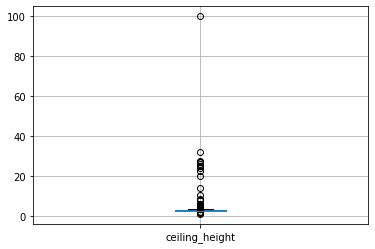

In [21]:
# построим диаграмму размаха
suppose_3_1.boxplot('ceiling_height')

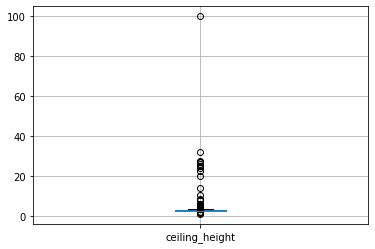

In [22]:
# какой то глюк, надо два раза запустить boxplot, чтобы отрисовал диаграмму размаха
suppose_3_1.boxplot('ceiling_height')

Получилось не наглядно. Отмаштабируем.

(2, 3.5)

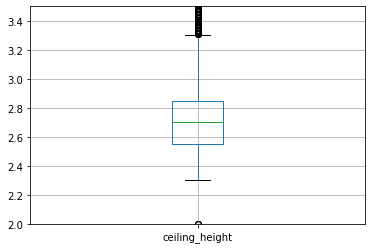

In [23]:
suppose_3_1.boxplot('ceiling_height')
plt.ylim(2, 3.5)

Теперь наглядно.По графику легко определить, "нижний ус" равный 2.3 и "верхний ус" - 3.3. Все, что не попадает в область значений крайних значений усов - есть выбросы. 
На основании полученных данных откорректируем наш справочник.

In [24]:
suppose_3_1=suppose_3_1.query('2.3<=ceiling_height<=3.3').reset_index(drop=True)
suppose_3_1

,locality_name,cityCenters_nearest,airports_nearest,floors_total,ceiling_height
0,САНКТ-ПЕТЕРБУРГ,16028.0,18863.0,16.0,2.70
1,САНКТ-ПЕТЕРБУРГ,8098.0,31856.0,14.0,3.03
2,САНКТ-ПЕТЕРБУРГ,15008.0,50898.0,9.0,2.50
3,САНКТ-ПЕТЕРБУРГ,13878.0,38357.0,12.0,2.67
4,ПЕТЕРГОФ,33058.0,37868.0,5.0,2.56
...,...,...,...,...,...
8981,ЛОМОНОСОВ,51818.0,48393.0,5.0,2.50
8982,САНКТ-ПЕТЕРБУРГ,11602.0,11751.0,9.0,2.55
8983,САНКТ-ПЕТЕРБУРГ,14428.0,15632.0,15.0,3.05
8984,САНКТ-ПЕТЕРБУРГ,4489.0,19424.0,25.0,2.75


Составим словарь в котором ключ это конкретный дом, определяемый как связка значений населенный пункт+удаленность от аэропорта+удаленность от центра города+этажность дома, а значением будет высота потолка. Для формирования словаря-справочника по 4 значениям напишем функцию make_dict_for_4_values.

In [25]:
# объявляем функцию, с параметрами название словаря, и срез таблицы по которой будет формироватся словарь
def make_dict_for_4_values(name_of_dict,table):
    for i in range(len(table)):
        try:
            # сначала пытаемся добавить к ключу еще одно значение в список
            name_of_dict[str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3])].append(table.loc[i][4])
        except AttributeError:
        # если ключ,имеет уже значение, то создаем список из значений
            name_of_dict[str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3])]=([name_of_dict[str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3])],table.loc[i][4]])
        # ключ со значениями больше одного,добавляем в список many_values_of_keys_4
            many_values_of_keys_4.append(str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3]))
        # если ключа нет в словаре, создаем первую пару ключ-значение
        except KeyError:
            name_of_dict[str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3])]=(table.loc[i][4])
    print('Длина словаря:',len(name_of_dict),'\\n','Количество ключей имеющих больше одного значения',len(many_values_of_keys_4))

In [26]:
# объявляем cловарь-справочник
dict_suppose_3_1={}
# объявляем список для ключей имеющих больше одного значения
many_values_of_keys_4=[]
# формируем cловарь используя написаную функцию 
make_dict_for_4_values(dict_suppose_3_1,suppose_3_1)

Длина словаря: 7533 \n Количество ключей имеющих больше одного значения 1187


Словарь имеет ключи в которых больше одного значения, это означает:
    
Вариант1: владельцы объявлений указавали не точную высоту потолков, а примерную. В одном и том же доме не может быть разной высоты потолков. 

Вариант2: менее правдоподобный, но возможный: это не серийные дома, из одного населенного пункта, одинаковой этажности, равноудаленные от своих центров и аэропортов.

Подкорректируем наш словарь для ключей со значением больше одного, как средняя между величинами одного ключа.

Необходимо, рекомендовать программистам из Я.Недвижимость подтягивать значение высоты потолков из кадастровой выписки по конкретному дому или по серии(типу) дома.

In [27]:
# функция перезаписи словаря по ключу с присваиванием ключу среднего значения
def refresh_dict(dict_to_refresh, list_of_keys):
    for name in list_of_keys:
        total=0
        for i in range(len(dict_to_refresh[name])):
            total+=dict_to_refresh[name][i]
            mean_value=total/len(dict_to_refresh[name])
        del dict_to_refresh[name]
        dict_to_refresh[name]=mean_value    
    return

In [28]:
refresh_dict(dict_suppose_3_1,many_values_of_keys_4)

Проверим замену в словаре по первому ключу, которое имел больше одного значения.

In [29]:
print('Ключ:',many_values_of_keys_4[0], 'значение:', dict_suppose_3_1[many_values_of_keys_4[0]])

Ключ: ПОСЕЛОК ШУШАРЫ#24272.0#18471.0#9.0 значение: 2.625


Замена прошла успешно. Произведем замену в исходной таблице data, для этого нам придется распарсить ключи.Распарсинг будем проводить по длине значения в ключе, до разделителя "#" указанного между значениями.

In [30]:
for key in dict_suppose_3_1.keys():
    # распарсим ключ на значения для каждого из столбцов
    local_name_value=key[0:(key.index("#"))]
    cityCenters_nearest_value=float(key[(key.index("#")+1):][0:key[(key.index("#")+1):].index('#')])
    airports_nearest_value=float(key[(key.index("#")+key[len(key[0:(key.index("#")+1)]):].index('#')+2):][0:key[(key.index("#")+key[len(key[0:(key.index("#")+1)]):].index('#')+2):].index('#')])
    floor_total_value=float(key[len(key)-5+key[-6:].index('#'):])
    # узнаем индекс строки которая соответствует значениям из нашего справочника, в которой пропущено значение высоты потолка
    # запишем в переменную index_of_line_of_null_ceiling_height индексы строк в которыхнеобходима замена.
    index_of_line_of_null_ceiling_height=data.query('locality_name in @local_name_value & floors_total==@floor_total_value & cityCenters_nearest==@cityCenters_nearest_value & airports_nearest==@airports_nearest_value & ceiling_height.isnull()')['ceiling_height'].index.tolist()
    # меняем в строке с найденным индексом пропущеное значение высоты потолка на среднее значение из справочника 
    data.loc[index_of_line_of_null_ceiling_height, 'ceiling_height']=data.loc[index_of_line_of_null_ceiling_height, 'ceiling_height'].fillna(dict_suppose_3_1[key])

Замену в исходной таблице data произведена, подсчитаем сколько осталось пустых значений в столбце 'ceiling_height'

In [31]:
print('Заменено {:.2%}'.format((9178-data['ceiling_height'].isnull().sum())/9178),'пустых значений в столбце "ceiling_height"')

Заменено 29.88% пустых значений в столбце "ceiling_height"


Заполним остальные 70% пропущенных значений высоты потолков в соответствии со средним значением для домов одинаковой этажности. 
Предположим, что дома одинаковой этажности типовые или серийные.
Возьмем из нашего справочника dict_suppose_3_1 значение этажности дома и среднее значение высоты потолка.

In [32]:
# если делать красиво, то надо делать одну функцию формирования словаря,
# в которой одним из параметров будет количество значений ключа
# будет время исправлю, а пока код, для формирования словаря по несоставному ключу
def make_a_dict_for_1_value(name_of_dict,table):
    for i in range(len(table)):
        try:
            # сначала пытаемся добавить к ключу еще одно значение в список
            name_of_dict[table.loc[i][0]].append(table.loc[i][1])
        except AttributeError:
        # если ключ,имеет уже значение, то создаем список из значений
            name_of_dict[table.loc[i][0]]=([name_of_dict[table.loc[i][0]],table.loc[i][1]])
        # ключ со значениями больше одного,добавляем в список list_of_keys_with_many_values
            list_of_keys_with_many_values.append(table.loc[i][0])
            #many_values_of_keys_4.append(str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3]))
        # если ключа нет в словаре, создаем первую пару ключ-значение
        except KeyError:
            name_of_dict[table.loc[i][0]]=table.loc[i][1]
    print('Длина словаря:',len(name_of_dict),'\n','Количество ключей имеющих больше одного значения',len(list_of_keys_with_many_values))

In [33]:
suppose_3_1.drop(['locality_name','cityCenters_nearest','airports_nearest'], axis='columns', inplace=True)

In [34]:
dict_suppose_3_1_total_floors_full={}
list_of_keys_with_many_values=[]
make_a_dict_for_1_value(dict_suppose_3_1_total_floors_full,suppose_3_1)

Длина словаря: 34 
 Количество ключей имеющих больше одного значения 29


Для 29 ключей имеющих больше одного значения высот потолков. Возьмем среднею для каждого из таких ключей, затем перезапишем в словарь dict_suppose_3_1_total_floors_full, воспользуемся функцией refresh_dict

In [35]:
refresh_dict(dict_suppose_3_1_total_floors_full, list_of_keys_with_many_values)
dict_suppose_3_1_total_floors_full

{34.0: 2.65,
 60.0: 2.88,
 29.0: 2.6,
 36.0: 2.7,
 52.0: 2.65,
 5.0: 2.7103536345776162,
 16.0: 2.6909824561403526,
 9.0: 2.5781839904420574,
 4.0: 2.8932135306553906,
 23.0: 2.751583333333333,
 25.0: 2.723140243902439,
 3.0: 2.8460103626943005,
 10.0: 2.6582092555331966,
 8.0: 2.8361111111111126,
 17.0: 2.714042553191488,
 12.0: 2.6405000000000007,
 24.0: 2.741036585365854,
 22.0: 2.7309638554216864,
 7.0: 2.871598513011151,
 14.0: 2.6416104868913868,
 19.0: 2.776526315789473,
 15.0: 2.6919230769230786,
 11.0: 2.7723076923076926,
 6.0: 2.9525125628140714,
 13.0: 2.7167816091954022,
 18.0: 2.708853503184713,
 20.0: 2.765052631578948,
 26.0: 2.676086956521739,
 21.0: 2.714318181818182,
 27.0: 2.6946874999999997,
 2.0: 2.865714285714286,
 35.0: 2.696,
 28.0: 2.60625,
 1.0: 2.7125000000000004}

Произведем замену в столбце 'ceiling_height'.

In [36]:
# запусть цикл, для каждого ключа из списка ключей словаря dict_suppose_3_1_total_floors_full
for key in dict_suppose_3_1_total_floors_full.keys():
    # узнаем индекс строки которая соответствует значениям из нашего справочника, в которой пропущено значение высоты потолка
    floor_total_value=float(key)
    # запишем в переменную index_of_line_of_null_ceiling_height
    index_of_line_of_null_ceiling_height=data.query('ceiling_height.isnull() &  floors_total==@floor_total_value')['ceiling_height'].index.tolist()
    # меняем в строке с найденным индексом пропущеное значение высоты потолка на среднее значение из справочника 
    data.loc[index_of_line_of_null_ceiling_height, 'ceiling_height']=data.loc[index_of_line_of_null_ceiling_height, 'ceiling_height'].fillna(dict_suppose_3_1_total_floors_full[key])

In [37]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             72
floors_total               80
living_area              1886
floor                       0
is_apartment            20907
studio                      0
open_plan                   0
kitchen_area             2261
balcony                 11502
locality_name              49
airports_nearest         5525
cityCenters_nearest      5502
parks_around3000         5501
parks_nearest           15603
ponds_around3000         5501
ponds_nearest           14572
days_exposition          3169
dtype: int64

Из 9195 пустых значений столбца 'ceiling_height', осталось 72. Но мы заполнили пропущенные значения везде, где проставлено значение всего этажей в доме.


### 2.3.2. Заполним пропуски в столбце всего этажей.

Докажем, что дома в одном населенном пункте, равноудаленные от аэропортов, своих центров и локаций пруд или парк, имеют одинаковую этажность, а следовательно это один и тот же дом. Если мы это докажем, то мы сможем заполнить пропуски в столбце floors_total.

Для этого составим срезы таблиц, где эти данные определены.

In [38]:
# дома в одном населенном пункте у которых нет этажности,но указана удаленность от аэропорта, центра города и пруда 
# подсчитаем количество таких домов
print('Количество таких домов:',len(data.query('floors_total.isnull() & airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull()&ponds_nearest.notnull()')))
# сделаем срез
try_to_fill_floors1=data.query('floors_total.isnull() & airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull()&ponds_nearest.notnull()')[
    ['locality_name','cityCenters_nearest','airports_nearest','ponds_nearest']].reset_index(drop=True)
# сделаем список из таких домов
list_of_key_try_to_fill_floors1=[]


Количество таких домов: 49


In [39]:
# дома в которых нет этажности,удаленность от аэропорта, центра города и пруда, в одном населенном пункте
# подсчитаем количество таких домов
print('Количество таких домов:',len(data.query('floors_total.isnull() & airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull()&parks_nearest.notnull()&ponds_nearest.isnull()')))
# сделаем срез
try_to_fill_floors2=data.query('floors_total.isnull() & airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull()&parks_nearest.notnull()&ponds_nearest.isnull()')[
    ['locality_name','cityCenters_nearest','airports_nearest','parks_nearest']].reset_index(drop=True)
# сделаем список из таких домов
list_of_key_try_to_fill_floors2=[]

Количество таких домов: 10


Если гипотеза верна то, таким способом это позволит нам заполнить 59 пустых значений из 80 пустых значений столбца 'floors_total'

In [40]:
# сделаем фунцию формирования списка ключей
def make_list_of_keys(namelist,table):
    for i in range(len(table)):
        namelist.append(str(table.loc[i][0])+'#'+str(table.loc[i][1])+'#'+str(table.loc[i][2])+'#'+str(table.loc[i][3]))
    return

In [41]:
# запустим функцию по двум таблицам
make_list_of_keys(list_of_key_try_to_fill_floors1,try_to_fill_floors1)
make_list_of_keys(list_of_key_try_to_fill_floors2,try_to_fill_floors2)
# для каждого списка оставит только уникальные значения методом set() 
list_of_key_try_to_fill_floors1 = list(set(list_of_key_try_to_fill_floors1))
list_of_key_try_to_fill_floors2 = list(set(list_of_key_try_to_fill_floors2))

Подготовим срезы таблицы для формирования справочника-словаря, в котором ключ это связка из 4х значений, а значение ключа этажность.
Срез таблицы населенный пункт+удаленность от аэропорта+удаленность от центра города+удаленность от парка (назовем cut_of_table_parks) или пруда(cut_of_table_ponds), а значением будет всего этажей.

In [42]:
cut_of_table=data.query('floors_total.notnull() & airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull()&parks_nearest>0')[
    ['locality_name','cityCenters_nearest','airports_nearest','parks_nearest','floors_total']].reset_index(drop=True)
cut_of_table=cut_of_table.drop_duplicates().reset_index(drop= True)

In [43]:
cut_of_table2=data.query('floors_total.notnull() & airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull()&ponds_nearest>0')[
    ['locality_name','cityCenters_nearest','airports_nearest','ponds_nearest','floors_total']].reset_index(drop=True)
cut_of_table2=cut_of_table2.drop_duplicates().reset_index(drop= True)

Составим справочник-словарь, в котором ключ это связка из 4х значений, а значение ключа этажность.
Пример ключа: населенный пункт+удаленность от аэропорта+удаленность от центра города+удаленность от пруда, а значением будет всего этажей.

In [44]:
dict_for_total_floors_from_parks={}
make_dict_for_4_values(dict_for_total_floors_from_parks,cut_of_table)

Длина словаря: 4583 \n Количество ключей имеющих больше одного значения 1680


In [45]:
dict_for_total_floors_from_ponds={}
make_dict_for_4_values(dict_for_total_floors_from_ponds,cut_of_table2)

Длина словаря: 4699 \n Количество ключей имеющих больше одного значения 2308


Попытки заполнить пропуски корректными значениями в столбце total_floors, оказалась нереальной задачей, т.к. на основании данных которые представлены, нельзя однозначно сказать являются ли объявления для одного дома. Заполнять медианным значением пропуски для столбца \"всего этажей\" считаю утопией.
В связи с небольшим количеством таких домов, а именно 80, что является 0,3% от всех данных, принимаю ответственость за удаление данных строк.

In [46]:
# удаляем строки с пропущенными значениями в столбце 'floors_total'
data.dropna(subset=['floors_total'], inplace = True)
# обновляем индексы у таблицы
data=data.reset_index()
# столбец со старыми индексами удаляем
del data['index']
# выведем несколько последних строк
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23597,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.3,3,NaN,...,13.83,NaN,САНКТ-ПЕТЕРБУРГ,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23598,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.710354,5.0,38.0,4,NaN,...,8.50,NaN,ТОСНО,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23599,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.846010,3.0,29.7,1,NaN,...,NaN,NaN,СЕЛО РОЖДЕСТВЕНО,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23600,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,NaN,12,NaN,...,23.30,2.0,САНКТ-ПЕТЕРБУРГ,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23601,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.500000,5.0,12.3,1,NaN,...,9.00,NaN,ПОСЕЛОК НОВЫЙ УЧХОЗ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Подсчитаем пропуски.

In [47]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area              1859
floor                       0
is_apartment            20827
studio                      0
open_plan                   0
kitchen_area             2220
balcony                 11469
locality_name              48
airports_nearest         5521
cityCenters_nearest      5498
parks_around3000         5497
parks_nearest           15557
ponds_around3000         5497
ponds_nearest           14541
days_exposition          3161
dtype: int64

### 2.3.3 Заполним пропуски в  столбце 'locality_name' .
Предположим, что если в строках таблицы мы найдем уникальные строки, дома которых имеют одинаковую этажность, равноудалены от своих центров и  от аэропорта, при этом равноудалены от парка или пруда, то эти дома из одного населенного пункта.
Если мы это докажем, то это позволит нам заполнить пустые значения в столбце locality_name.аем

Для составления справочника, сделаем срез данных где данные определены для столбцов cityCenters_nearest,  ponds_nearest,  airports_nearest,  floors_total,  locality_name.

In [48]:
# сделаем срез где данные определены для столбцов cityCenters_nearest,  ponds_nearest,  airports_nearest,  floors_total,  locality_name  
# удалим дубликаты методом drop_duplicates() обновим индексы методом reset_index()
cut_of_table_with_ponds=data.query('airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull() & floors_total.notnull() &ponds_nearest.notnull()')[
['cityCenters_nearest','ponds_nearest','airports_nearest','floors_total','locality_name']].drop_duplicates().reset_index(drop= True)
#выведем длинну и несколько значений справочника
print('Длина среза данных для справочника:',len(cut_of_table_with_ponds),'\n',cut_of_table_with_ponds.head())

Длина среза данных для справочника: 5665 
    cityCenters_nearest  ponds_nearest  airports_nearest  floors_total  \
0              16028.0          755.0           18863.0          16.0   
1              13933.0          574.0           21741.0           5.0   
2               6800.0          234.0           28098.0          14.0   
3               8098.0           48.0           31856.0          14.0   
4              13878.0          553.0           38357.0          12.0   

     locality_name  
0  САНКТ-ПЕТЕРБУРГ  
1  САНКТ-ПЕТЕРБУРГ  
2  САНКТ-ПЕТЕРБУРГ  
3  САНКТ-ПЕТЕРБУРГ  
4  САНКТ-ПЕТЕРБУРГ  


Составим словарь-справочник, назовем его dict_of_local_name_with_ponds, вызовом ранее написанной функцией make_dict_for_4_values.

In [49]:
# объявляем cловарь-справочник
dict_of_local_name_with_ponds={}
# обнуляем список ключей имеющих больше одного значения
many_values_of_keys_4=[]
make_dict_for_4_values(dict_of_local_name_with_ponds,cut_of_table_with_ponds)
print(many_values_of_keys_4)

Длина словаря: 5665 \n Количество ключей имеющих больше одного значения 0
[]


Ключи имеют, только одно значение, значит гипотеза была верна, что только одной локации присуще связка из набора данных cityCenters_nearest,  ponds_nearest,  airports_nearest,  floors_total.

Заполним пропущенные значения в столбце locality_name, при помощи сформированного словаря.

In [50]:
for key in dict_of_local_name_with_ponds.keys():
    # распарсим ключ на значения для каждого из столбцов
    cityCenters_nearest_value=float(key[0:(key.index("#"))])
    # кажется, что тут без бутылки не разобратся,но здесь просто операции со строками
    ponds_nearest_value=float(key[(key.index("#")+1):][0:key[(key.index("#")+1):].index('#')])
    airports_nearest_value=float(key[(key.index("#")+key[len(key[0:(key.index("#")+1)]):].index('#')+2):][0:key[(key.index("#")+key[len(key[0:(key.index("#")+1)]):].index('#')+2):].index('#')])
    floor_total_value=float(key[len(key)-5+key[-6:].index('#'):])
    # узнаем индекс строки которая соответствует значениям из нашего справочника, в которой пропущено значение высоты потолка
    # запишем в переменную index_of_line_where_isnull_local_name индексы строк в которыхнеобходима замена.
    index_of_line_where_isnull_local_name=data.query('ponds_nearest==@ponds_nearest_value & floors_total==@floor_total_value & cityCenters_nearest==@cityCenters_nearest_value & airports_nearest==@airports_nearest_value & locality_name.isnull()')['locality_name'].index.tolist()
    # меняем в строке с найденным индексом пропущеное значение высоты потолка на среднее значение из справочника 
    data.loc[index_of_line_where_isnull_local_name, 'locality_name']=data.loc[index_of_line_where_isnull_local_name, 'locality_name'].fillna(dict_of_local_name_with_ponds[key])

Проделаем тоже самое, только вместо ponds_nearest будет parks_nearest.
Для составления справочника, сделаем срез данных где данные определены для столбцов cityCenters_nearest,  parks_nearest,  airports_nearest,  floors_total,  locality_name.

In [51]:
# сделаем срез где данные определены для столбцов cityCenters_nearest,   parks_nearest,  airports_nearest,  floors_total,  locality_name  
# удалим дубликаты методом drop_duplicates() обновим индексы методом reset_index()
cut_of_table_with_parks=data.query('airports_nearest>0 & cityCenters_nearest>0 & locality_name.notnull() & floors_total.notnull() & parks_nearest.notnull()')[
['cityCenters_nearest','parks_nearest','airports_nearest','floors_total','locality_name']].drop_duplicates().reset_index(drop= True)
#выведем длинну и несколько значений справочника
print('Длина среза данных для справочника:',len(cut_of_table_with_parks),'\\n',cut_of_table_with_parks.head())

Длина среза данных для справочника: 5262 \n    cityCenters_nearest  parks_nearest  airports_nearest  floors_total  \
0              16028.0          482.0           18863.0          16.0   
1              13933.0           90.0           21741.0           5.0   
2               6800.0           84.0           28098.0          14.0   
3               8098.0          112.0           31856.0          14.0   
4              13878.0          310.0           38357.0          12.0   

     locality_name  
0  САНКТ-ПЕТЕРБУРГ  
1  САНКТ-ПЕТЕРБУРГ  
2  САНКТ-ПЕТЕРБУРГ  
3  САНКТ-ПЕТЕРБУРГ  
4  САНКТ-ПЕТЕРБУРГ  


In [52]:
# объявляем cловарь-справочник
dict_of_local_name_with_parks={}
# обнуляем список для ключей имеющих больше одного значения
many_values_of_keys_4=[]
make_dict_for_4_values(dict_of_local_name_with_parks,cut_of_table_with_parks)
print(many_values_of_keys_4)

Длина словаря: 5262 \n Количество ключей имеющих больше одного значения 0
[]


Ключи имеют, только одно значение, значит гипотеза была верна, что только одной локации присуще связка из набора данных cityCenters_nearest,  parks_nearest,  airports_nearest,  floors_total.

Заполним пропущенные значения в столбце locality_name, при помощи сформированного словаря.

In [53]:
for key in dict_of_local_name_with_parks.keys():
    # распарсим ключ на значения для каждого из столбцов
    cityCenters_nearest_value=float(key[0:(key.index("#"))])
    # кажется, что тут без бутылки не разобратся,но здесь просто операции со строками
    parks_nearest_value=float(key[(key.index("#")+1):][0:key[(key.index("#")+1):].index('#')])
    airports_nearest_value=float(key[(key.index("#")+key[len(key[0:(key.index("#")+1)]):].index('#')+2):][0:key[(key.index("#")+key[len(key[0:(key.index("#")+1)]):].index('#')+2):].index('#')])
    floor_total_value=float(key[len(key)-5+key[-6:].index('#'):])
    # узнаем индекс строки которая соответствует значениям из нашего справочника, в которой пропущено значение высоты потолка
    # запишем в переменную index_of_line_where_isnull_local_name индексы строк в которыхнеобходима замена.
    index_of_line_where_isnull_local_name=data.query('parks_nearest==@parks_nearest_value & floors_total==@floor_total_value & cityCenters_nearest==@cityCenters_nearest_value & airports_nearest==@airports_nearest_value & locality_name.isnull()')['locality_name'].index.tolist()
    # меняем в строке с найденным индексом пропущеное значение высоты потолка на среднее значение из справочника
    data.loc[index_of_line_where_isnull_local_name, 'locality_name']=data.loc[index_of_line_where_isnull_local_name, 'locality_name'].fillna(dict_of_local_name_with_parks[key])

Снова подсчитаем количесто пустых строк в столбце 'locality_name'

In [54]:
data['locality_name'].isnull().sum()

43

Всего 5 объявлений мы нашли по одним и тем же домам.
Исследуем таблицу по фильтру столбец locality name с пустыми значениями. Попробуем определить закономерности.

### Посмотрим,на общую статистику по значениям столбцов 'airports_nearest' и 'cityCenters_nearest'  города Санкт-Петербург, и населенных пунктов в области, попробуем найти закономерности.

In [55]:
# перефирия аэропорты
len_obl_air=data.query('locality_name!=\"САНКТ-ПЕТЕРБУРГ\" & locality_name.notnull() & airports_nearest>0')['airports_nearest'].describe()
# питер аэропорты
piter_air=data.query('locality_name==\"САНКТ-ПЕТЕРБУРГ\" & airports_nearest>0')['airports_nearest'].describe()
# не указана локация аэропорты
no_name_air=data.query('locality_name.isnull() & airports_nearest>0')['airports_nearest'].describe()
# перефирия центры
len_obl_center=data.query('locality_name!=\"САНКТ-ПЕТЕРБУРГ\" & locality_name.notnull() & cityCenters_nearest>0')['cityCenters_nearest'].describe()
# питер центры
piter_center=data.query('locality_name==\"САНКТ-ПЕТЕРБУРГ\" & cityCenters_nearest>0')['cityCenters_nearest'].describe()
# не указана локация центры
no_name_center=data.query('locality_name.isnull() & cityCenters_nearest>0')['cityCenters_nearest'].describe()

In [56]:
compare=pd.DataFrame(len_obl_air)
compare.rename(columns={'airports_nearest': 'Лен.обл.'}, inplace=True)
compare['Санкт-Петербург']=piter_air
compare['НоуНеймы']=no_name_air
compare['Лен.обл.2']=len_obl_center
compare['Санкт-Петербург2']=piter_center
compare['НоуНеймы2']=no_name_center
arrays = [['airports_nearest', 'airports_nearest', 'airports_nearest','cityCenters_nearest','cityCenters_nearest','cityCenters_nearest'], compare.columns]
compare.columns = pd.MultiIndex.from_arrays(arrays)
compare

airports_nearest                               cityCenters_nearest  \
              Лен.обл. Санкт-Петербург      НоуНеймы           Лен.обл.2   
count      2474.000000    15571.000000     35.000000         2473.000000   
mean      33559.056184    28040.499518  24921.514286        30610.566114   
std       17270.512107    11545.725104   9081.430201         9077.894034   
min        9294.000000     6450.000000  10556.000000        17012.000000   
25%       18544.500000    18577.000000  21907.500000        24765.000000   
50%       26725.500000    26757.000000  23297.000000        30375.000000   
75%       52610.000000    36583.500000  25848.000000        33719.000000   
max       84869.000000    54784.000000  60195.000000        65968.000000   

                                      
      Санкт-Петербург2     НоуНеймы2  
count     15596.000000     35.000000  
mean      11587.050846  11291.028571  
std        4833.214375   8610.895917  
min         181.000000   1780.000000  
25%        8321.250000   4428.500000  
50%       12242.000000   8943.000000  
75%       14938.250000  17369.000000  
max       29493.000000  41294.000000

### Глядя на статистику, можно утверждать, что там где значение расстояния до центра города меньше чем у минимального расстояния до центра города по Лен.области, то этот  населенный пункт является Санкт-Петербургом. Заполним пустые значения исходя из полученной информации.

Найдем индексы строк где столбец locality_name пустое и при этом имеет значение расстояния до центра города меньше 17012м, где 17012м - это минимального расстояния до центра населенного пункта по Лен.области.

In [57]:
# найдем индексы строк
index_of_line_where_isnull_local_name=data.query('cityCenters_nearest<17012 & locality_name.isnull()')['locality_name'].index.tolist()
# меняем в строке с найденным индексом пропущеное значение населенного пункта
data.loc[index_of_line_where_isnull_local_name, 'locality_name']=data.loc[index_of_line_where_isnull_local_name, 'locality_name'].fillna("САНКТ-ПЕТЕРБУРГ")
print('Осталось {:d} строк имеющие пустое значение в столбце "locality_name"'.format(data['locality_name'].isnull().sum()))

Осталось 19 строк имеющие пустое значение в столбце "locality_name"


Удалим 19 строк где значение столбца "locality_name" не определено.

In [58]:
# удаляем строки с пропущенными значениями в столбце 'floors_total'
data.dropna(subset=['locality_name'], inplace = True)
# обновляем индексы у таблицы
data=data.reset_index()
# столбец со старыми индексами удаляем
del data['index']
# выведем несколько последних строк
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23578,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.3,3,NaN,...,13.83,NaN,САНКТ-ПЕТЕРБУРГ,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23579,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.710354,5.0,38.0,4,NaN,...,8.50,NaN,ТОСНО,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23580,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.846010,3.0,29.7,1,NaN,...,NaN,NaN,СЕЛО РОЖДЕСТВЕНО,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23581,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,NaN,12,NaN,...,23.30,2.0,САНКТ-ПЕТЕРБУРГ,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23582,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.500000,5.0,12.3,1,NaN,...,9.00,NaN,ПОСЕЛОК НОВЫЙ УЧХОЗ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3.4 Заполним пропуски в столбце ponds_around3000. Пропущенные значения в столбце ponds_around3000 — число водоёмов в радиусе 3 км могут иметь пустое значение, т.к. прудов в конкретном населенном пункте может не быть. 

Найдем населенные пункты в которых есть пруды, и запишем их в переменную locality_name_with_ponds,для этого воспользуемся ранее написаной функцией find_unique_name.

Используя метод .loc, отфильтруем таблицу по пустым строкам из столбца число водоёмов в радиусе 3 км 'ponds_around3000' —  и населенным пунктам, которые не входят в список городов имеющие пруды locality_name_with_ponds. Затем заменим пустые строки на "0" с помощью метода .fillna()

In [59]:
locality_name_with_ponds=[]
# в городах в которых есть пруды запишем в переменную locality_name_with_ponds
#locality_name_with_ponds=data.query('ponds_around3000>0')['locality_name'].unique()
find_unique_name('ponds_around3000>0','locality_name',locality_name_with_ponds)

Количество уникальных значений столбца locality_name при условии ponds_around3000>0 равно: 18 

Уникальные значения столбца locality_name при условии ponds_around3000>0 : 

 ['САНКТ-ПЕТЕРБУРГ' 'ПЕТЕРГОФ' 'ПУШКИН' 'ПОСЕЛОК ШУШАРЫ' 'ЛОМОНОСОВ'
 'КРОНШТАДТ' 'ПОСЕЛОК ПАРГОЛОВО' 'КОЛПИНО' 'ПАВЛОВСК' 'СЕСТРОРЕЦК'
 'ЗЕЛЕНОГОРСК' 'ПОСЕЛОК АЛЕКСАНДРОВСКАЯ' 'ПОСЕЛОК ПОНТОННЫЙ'
 'КРАСНОЕ СЕЛО' 'ПОСЕЛОК ПЕТРО-СЛАВЯНКА' 'ПОСЕЛОК СТРЕЛЬНА'
 'ПОСЕЛОК САПЕРНЫЙ' 'ПОСЕЛОК БЕЛООСТРОВ']
Уникальные значения записаны в переменую


Найдем индексы строк где пропущено значение ponds_around3000 и строки с населенными пунктами, которые не входят в список локаций имеющих пруды locality_name_with_ponds, запишем их в переменную index_of_line_where_isnull_ponds_around3000.
Затем в этих строках заполним значения ponds_around3000 равное 0.

In [60]:
# индексы записываем в список index_of_line_where_isnull_ponds_around3000
index_of_line_where_isnull_ponds_around3000=data.query('ponds_around3000.isnull() & locality_name not in @locality_name_with_ponds')['locality_name'].index.tolist()
data.loc[index_of_line_where_isnull_ponds_around3000, 'ponds_around3000']=data.loc[index_of_line_where_isnull_ponds_around3000, 'ponds_around3000'].fillna(0)
print('Осталось {:d} строк имеющие пустое значение в столбце "ponds_around3000"'.format(data['ponds_around3000'].isnull().sum()))

Осталось 59 строк имеющие пустое значение в столбце "ponds_around3000"


### 2.3.5 Заполним пропуски в столбце parks_around3000. Пропущенные значения в столбце parks_arond3000 — число парков в радиусе 3 км могут иметь пустое значение, т.к. парков в конкретном населенном пункте может не быть.

Делаем все те же операции как с прудами только для парков. Сохраним в список locality_name_with_parks населенные пункты в которых есть парки.

In [61]:
locality_name_with_parks=[]
# в городах в которых есть пруды запишем в переменную locality_name_with_parks
find_unique_name('parks_around3000>0','locality_name',locality_name_with_parks)

Количество уникальных значений столбца locality_name при условии parks_around3000>0 равно: 12 

Уникальные значения столбца locality_name при условии parks_around3000>0 : 

 ['САНКТ-ПЕТЕРБУРГ' 'ПЕТЕРГОФ' 'ПУШКИН' 'КРОНШТАДТ' 'КОЛПИНО' 'ПАВЛОВСК'
 'СЕСТРОРЕЦК' 'ЗЕЛЕНОГОРСК' 'КРАСНОЕ СЕЛО' 'ПОСЕЛОК СТРЕЛЬНА' 'ЛОМОНОСОВ'
 'ПОСЕЛОК ПАРГОЛОВО']
Уникальные значения записаны в переменую


In [62]:
index_of_line_where_isnull_parks_around3000=data.query('parks_around3000.isnull() & locality_name not in @locality_name_with_parks').index.tolist()
data.loc[index_of_line_where_isnull_parks_around3000, 'parks_around3000']=data.loc[index_of_line_where_isnull_parks_around3000, 'parks_around3000'].fillna(0)
print('Осталось {:d} строк имеющие пустое значение в столбце "parks_around3000"'.format(data['parks_around3000'].isnull().sum()))

Осталось 56 строк имеющие пустое значение в столбце "parks_around3000"


### 2.3.6 Заполним пропуски столбцов  столбцы parks_nearest и ponds_nearest.
Проверим, какие значения имеют столбцы parks_nearest и ponds_nearest, где значения столбцов parks_around3000 и ponds_around3000 равны 0.

In [63]:
print('Строки где столбец parks_around3000=0, имеет следующие значения', data.query('parks_around3000==0')['parks_nearest'].unique(), '\n'*2,'Строки где столбец ponds_around3000=0, имеет следующие значения', data.query('ponds_around3000==0')['ponds_nearest'].unique())

Строки где столбец parks_around3000=0, имеет следующие значения [  nan 3064. 3190. 3013.] 

 Строки где столбец ponds_around3000=0, имеет следующие значения [nan]


In [64]:
print('Строки где столбец parks_around3000>3000, имеет следующие значения', data.query('parks_around3000>3000')['parks_nearest'].unique(), '\n'*2,'Строки где столбец ponds_around3000>3000, имеет следующие значения', data.query('ponds_around3000>3000')['ponds_nearest'].unique())

Строки где столбец parks_around3000>3000, имеет следующие значения [] 

 Строки где столбец ponds_around3000>3000, имеет следующие значения []


На основании полученного результата, можем утверждать, что столбцы parks_nearest и ponds_nearest, где значения столбцов parks_around3000 и ponds_around3000 равны 0, можем заменить на нулевые значения.

In [65]:
index_of_line_where_isnull_parks_nearest=data.query('parks_around3000==0 & parks_nearest.isnull()').index.tolist() 
data.loc[index_of_line_where_isnull_parks_nearest, 'parks_nearest']=data.loc[index_of_line_where_isnull_parks_nearest, 'parks_nearest'].fillna(0)
print('Осталось {:d} строк имеющие пустое значение в столбце "parks_nearest"'.format(data['parks_nearest'].isnull().sum()))
index_of_line_where_isnull_ponds_nearest=data.query('ponds_around3000==0 & ponds_nearest.isnull()').index.tolist() 
data.loc[index_of_line_where_isnull_ponds_nearest, 'ponds_nearest']=data.loc[index_of_line_where_isnull_ponds_nearest, 'ponds_nearest'].fillna(0)
print('Осталось {:d} строк имеющие пустое значение в столбце "ponds_nearest"'.format(data['ponds_nearest'].isnull().sum()))

Осталось 56 строк имеющие пустое значение в столбце "parks_nearest"
Осталось 59 строк имеющие пустое значение в столбце "ponds_nearest"


In [66]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area              1856
floor                       0
is_apartment            20814
studio                      0
open_plan                   0
kitchen_area             2216
balcony                 11464
locality_name               0
airports_nearest         5513
cityCenters_nearest      5490
parks_around3000           56
parks_nearest              56
ponds_around3000           59
ponds_nearest              59
days_exposition          3160
dtype: int64

### 2.3.7 Заполним пропуски в столбце 'cityCenters_nearest' по среднему значению для каждого из населенного пункта.
Для этого составим словарь, в котором ключем будет населенный пункт, а значениями расстояние до центра города.
Чтобы составить словарь нам необходимо сделать срез данных по столбцу locality_name и знаениям cityCenters_nearest,затем воспользуемся ранее написанной функцией для составления словаря по одному значению make_a_dict_for_1_value.

In [67]:
# сделаем срез
cut_citycenters_and_locality_name=data.query('cityCenters_nearest.notnull()')[['locality_name','cityCenters_nearest']].drop_duplicates().reset_index(drop= True)
# объявим словарь
dict_for_citycenters_nearest={}
# обнулим ключи списка с несколькими значениями
list_of_keys_with_many_values=[]
make_a_dict_for_1_value(dict_for_citycenters_nearest,cut_citycenters_and_locality_name)

Длина словаря: 25 
 Количество ключей имеющих больше одного значения 22


Обновим словарь-справочник dict_for_citycenters_nearest с помощью ранее написанной функции refresh_dict, меняющей значение у ключа,на среднее значение.

In [68]:
refresh_dict(dict_for_citycenters_nearest,list_of_keys_with_many_values)

Проверим замену в словаре-справочнике dict_for_citycenters_nearest по первому ключу который имел несколько значений.

In [69]:
print('Ключ:',list_of_keys_with_many_values[0], 'значение:', dict_for_citycenters_nearest[list_of_keys_with_many_values[0]])

Ключ: САНКТ-ПЕТЕРБУРГ значение: 10769.71000475662


Замена в словаре-справочнике dict_for_citycenters_nearest прошла успешно. 
Заполним пропуски.

In [70]:
# запусть цикл, для каждого ключа из списка ключей словаря dict_for_citycenters_nearest
for key in dict_for_citycenters_nearest.keys():
    # узнаем индекс строки которая соответствует значениям из нашего справочника, в которой пропущено значение высоты потолка
    locality_name_value=str(key)
    # запишем в переменную index_of_line_where_isnull_citycenters_nearest
    index_of_line_where_isnull_citycenters_nearest=data.query('cityCenters_nearest.isnull() &  locality_name in @locality_name_value').index.tolist()
    # меняем в строке с найденным индексом пропущеное значение высоты потолка на среднее значение из справочника 
    data.loc[index_of_line_where_isnull_citycenters_nearest, 'cityCenters_nearest']=data.loc[index_of_line_where_isnull_citycenters_nearest, 'cityCenters_nearest'].fillna(dict_for_citycenters_nearest[key])

In [71]:
data['cityCenters_nearest'].isnull().sum()

5430

Таким способом удалось заменить 60 пропущенных значений, это говорит о том, что у остальных населенных пунктов не проставлено значение 'cityCenters_nearest'.
Проверим это.

In [72]:
# составим список из населенных пунктов, там где не проставлено значение столбца 'cityCenters_nearest'
list_of_locality_without_cityCenters=data.query('cityCenters_nearest.isnull()')['locality_name'].unique()
# сделаем срез в котором отобразим значения столбца 'cityCenters_nearest' по ранеесозданому списку населенных пунктов
data.query('locality_name in @list_of_locality_without_cityCenters')['cityCenters_nearest'].unique()

array([nan])

Гипотеза подтвердилась. Предполагаю, что данные населенные пункты настолько малы, что у них нет центра города, а значит  и значение 'cityCenters_nearest' можно проставить как 0.

In [73]:
index_of_line_where_isnull_citycenters_nearest=data.query('cityCenters_nearest.isnull() & locality_name in @list_of_locality_without_cityCenters').index.tolist()
data.loc[index_of_line_where_isnull_citycenters_nearest, 'cityCenters_nearest']=data.loc[index_of_line_where_isnull_citycenters_nearest, 'cityCenters_nearest'].fillna(0)
print('Осталось {:d} строк имеющие пустое значение в столбце "cityCenters_nearest"'.format(data['cityCenters_nearest'].isnull().sum()))


Осталось 0 строк имеющие пустое значение в столбце "cityCenters_nearest"


### 2.3.8 Заполним пропуски в столбце 'airports_nearest' по среднему значению для каждого из населенного пункта.
Для этого составим словарь, в котором ключем будет населенный пункт, а значениями расстояние до центра города.
Чтобы составить словарь нам необходимо сделать срез данных по столбцу locality_name и знаениям airports_nearest,затем воспользуемся ранее написанной функцией для составления словаря по одному значению make_a_dict_for_1_value.

In [74]:
# сделаем срез
cut_airports_nearest_and_locality_name=data.query('airports_nearest.notnull()')[['locality_name','airports_nearest']].drop_duplicates().reset_index(drop= True)
# объявим словарь
dict_for_airports_nearest={}
# обнулим ключи списка с несколькими значениями
list_of_keys_with_many_values=[]
make_a_dict_for_1_value(dict_for_airports_nearest,cut_airports_nearest_and_locality_name)

Длина словаря: 25 
 Количество ключей имеющих больше одного значения 22


In [75]:
data['airports_nearest'].isnull().sum()

5513

In [76]:
refresh_dict(dict_for_airports_nearest,list_of_keys_with_many_values)

In [77]:
# запусть цикл, для каждого ключа из списка ключей словаря dict_for_citycenters_nearest
for key in dict_for_airports_nearest.keys():
    # узнаем индекс строки которая соответствует значениям из нашего справочника, в которой пропущено значение высоты потолка
    locality_name_value=key
    # запишем в переменную index_of_line_where_isnull_citycenters_nearest
    index_of_line_where_isnull_airports_nearest=data.query('airports_nearest.isnull() &  locality_name in @locality_name_value').index.tolist()
    # меняем в строке с найденным индексом пропущеное значение высоты потолка на среднее значение из справочника 
    data.loc[index_of_line_where_isnull_airports_nearest, 'airports_nearest']=data.loc[index_of_line_where_isnull_airports_nearest, 'airports_nearest'].fillna(dict_for_airports_nearest[key])

In [78]:
data['airports_nearest'].isnull().sum()

5430

Таким способом удалось заменить 83 пропущенных значений, это говорит о том, что у остальных населенных пунктов не проставлено значение 'airports_nearest'.
Нет подходящих значений для замены пустых строк расстояние до аэропорта, кроме как парсить результат полученных значений из Я.Карты по каждому из населенных пунктов.

### 2.3.9  Заполним пропуски в столбце 'balcony'. Столбец балконы имеет пустые значения, скорее всего из-за того, что балконов в квартире нет. Проверим были ли вобще значения 0 в этом столбце 'balcony'.

In [79]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Для столбца 'balcony' встречаются значения 0. Заполним пропуски в этом столбце значением "-1", чтобы не смешивать пропуски с уже заполнеными значениеми 0.

In [80]:
data['balcony']=data['balcony'].fillna(-1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,25.0,-1.0,САНКТ-ПЕТЕРБУРГ,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.772308,11.0,18.6,1,NaN,...,11.0,2.0,ПОСЕЛОК ШУШАРЫ,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.710354,5.0,34.3,4,NaN,...,8.3,0.0,САНКТ-ПЕТЕРБУРГ,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.000000,14.0,NaN,9,NaN,...,NaN,0.0,САНКТ-ПЕТЕРБУРГ,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,41.0,-1.0,САНКТ-ПЕТЕРБУРГ,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [81]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area              1856
floor                       0
is_apartment            20814
studio                      0
open_plan                   0
kitchen_area             2216
balcony                     0
locality_name               0
airports_nearest         5430
cityCenters_nearest         0
parks_around3000           56
parks_nearest              56
ponds_around3000           59
ponds_nearest              59
days_exposition          3160
dtype: int64

### 2.3.10 Заполним пропуски в столбце kitchen_area — площадь кухни в квадратных метрах (м²). 
Квартиры-студии это квартиры у которых единое пространство, а значит  kitchen_area можем заменить на значение 0. 

In [82]:
data.query('studio==True')['kitchen_area'].unique()

array([nan])

In [83]:
index_of_null_kitchen=data.query('studio==True')['kitchen_area'].index.tolist()
data.loc[index_of_null_kitchen, 'kitchen_area']=data.loc[index_of_null_kitchen, 'kitchen_area'].fillna(0)

In [84]:
data['kitchen_area'].isnull().sum()

2070

146 нулов мы заполнили таким способом.
#### Посмотрим на корреляцию общей площади и площади кухни,если она положительная, то остальные пропуски в столбце 'kitchen_area', заполним как произведение общей площади на коэффициент(сколько занимает кухня от общей площади помещения).

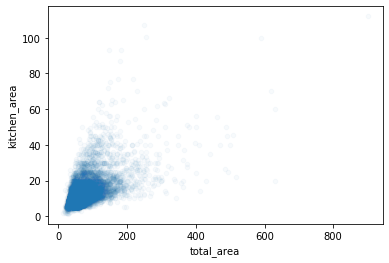

In [85]:
data.query('kitchen_area.notnull()&kitchen_area>0')[['total_area','kitchen_area']].sort_values('total_area').plot(x='total_area', y='kitchen_area', kind='scatter',alpha=0.03)

Мы видим на графике, что корреляция положительна.
Рассчитаем коэффициент корреляции Пирсона. Он помогает определить, как сильно меняется одна величина при изменении другой
Если с ростом первой величины, растёт вторая, то коэффициент корреляции Пирсона — положительный.

In [86]:
print('Коэффициент Пирсона равен:',data.query('kitchen_area.notnull()&kitchen_area>0')[['total_area','kitchen_area']]['total_area'].corr(data.query('kitchen_area.notnull()&kitchen_area>0')[['total_area','kitchen_area']]['kitchen_area']))

Коэффициент Пирсона равен: 0.6093518684072688


Коэффициент Пирсона равен: 0.61, чтобы увеличить значение этого коэффициента и выжать максимум из очевидности,нужно построить диаграмму размахаи избавится от выбросов.
Но мы уже доказали, что между величинами общей площади помещения и кухни есть положительная зависимость, чем больше площадь помещения, тем больше площадь кухни. Значит можем рассчитать коэффициэнт этой зависимости. Для этого воспользуемся методом describe()

In [87]:
data.query('kitchen_area.notnull()&kitchen_area')[['total_area','kitchen_area']].describe()

,total_area,kitchen_area
count,21367.000000,21367.000000
mean,60.720017,10.560944
std,35.014699,5.899363
min,14.000000,1.300000
25%,40.600000,7.000000
50%,52.400000,9.100000
75%,70.000000,12.000000
max,900.000000,112.000000


Расчитаем этот коэффициэнт, как отношение медианное значение kitchen_area/медианное значение total_area. 
9.1/52.4*100% = 17,4% занимает кухня от общей площади помещения.
Зная этот коэффициэнт, заполним пропущенные значения.

In [88]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data.loc[data['kitchen_area'].isnull(), 'total_area']*0.174

### 2.3.11 Посмотрим на корреляцию общей площади и жилой площади,если она положительная, то пропуски в столбце 'living_area', заполним как произведение общей площади на коэффициент(сколько процентов занимает жилая площадь от общей площади помещения).

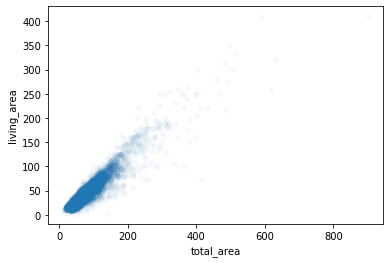

In [89]:
data.query('living_area.notnull()&living_area>0')[['total_area','living_area']].sort_values('total_area').plot(x='total_area', y='living_area', kind='scatter',alpha=0.03)

Мы видим на графике, что корреляция положительна.
Рассчитаем коэффициент корреляции Пирсона. 

In [90]:
print('Коэффициент Пирсона равен:',data.query('living_area.notnull()&living_area>0')[['total_area','living_area']]['total_area']
      .corr(data.query('living_area.notnull()&living_area>0')[['total_area','living_area']]['living_area']))

Коэффициент Пирсона равен: 0.9397927149219233


Коэффициент Пирсона равен: 0.94, это говорит о том, что зависимость положительна и стремится к максимальному значению 1.

Рассчитаем коэффициэнт этой зависимости. Для этого воспользуемся методом describe()

In [91]:
data.query('living_area.notnull()&living_area>0')[['total_area','living_area']].describe()

,total_area,living_area
count,21727.000000,21727.000000
mean,60.076000,34.465847
std,34.695686,22.043705
min,12.000000,2.000000
25%,40.000000,18.600000
50%,52.000000,30.000000
75%,69.500000,42.300000
max,900.000000,409.700000


Расчитаем этот коэффициэнт, как отношение медианное значение kitchen_area/медианное значение total_area. 
30/52*100% = 57,7% занимает жилая площадь от общей площади помещения.
Зная этот коэффициэнт, заполним пропущенные значения.

In [92]:
data.loc[data['living_area'].isnull(), 'living_area'] = data.loc[data['living_area'].isnull(), 'total_area']*0.577

In [93]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment            20814
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5430
cityCenters_nearest         0
parks_around3000           56
parks_nearest              56
ponds_around3000           59
ponds_nearest              59
days_exposition          3160
dtype: int64

### 2.3.12 Заполним пропущенные значения столбца days_exposition значением 0. Пропущенное значение в столбце days_exposition,говорит о том, что помещение еще не продалось. Но сначала проверим есть "0" в данном столбце.

In [94]:
data.query('days_exposition==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В столбце days_exposition значений 0 не найдено, заполним "0" пропущенные значения.

In [95]:
data['days_exposition']=data['days_exposition'].fillna(0)

Подсчитаем оставшиеся пропущенные значения.

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23583 entries, 0 to 23582
Data columns (total 22 columns):
total_images            23583 non-null int64
last_price              23583 non-null float64
total_area              23583 non-null float64
first_day_exposition    23583 non-null object
rooms                   23583 non-null int64
ceiling_height          23582 non-null float64
floors_total            23583 non-null float64
living_area             23583 non-null float64
floor                   23583 non-null int64
is_apartment            2769 non-null object
studio                  23583 non-null bool
open_plan               23583 non-null bool
kitchen_area            23583 non-null float64
balcony                 23583 non-null float64
locality_name           23583 non-null object
airports_nearest        18153 non-null float64
cityCenters_nearest     23583 non-null float64
parks_around3000        23527 non-null float64
parks_nearest           23527 non-null float64
ponds_around30

Проверим, в одних ли строках и тех же строках пропущены значения parks_around3000 и ponds_around3000

In [97]:
data.query('parks_around3000.isnull()')['ponds_around3000'].unique()

array([nan])

Это одни и те же строки. Поверим, что находится в строке с пропущенным значением 'ceiling_height'.

In [98]:
data.query('ceiling_height.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11515,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,САНКТ-ПЕТЕРБУРГ,18732.0,20444.0,0.0,0.0,3.0,80.0,53.0


Т.е. у нас осталось 60 строк для которых мы не можем определить значения, удалим их так это 0,25% от оставшихся строк.

In [99]:
data.dropna(subset = ['ponds_around3000','ceiling_height'],inplace = True)
# обновляем индексы у таблицы
data=data.reset_index()
# столбец со старыми индексами удаляем
del data['index']
# выведем несколько последних строк
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23518,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.30000,3,NaN,...,13.8300,-1.0,САНКТ-ПЕТЕРБУРГ,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0
23519,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.710354,5.0,38.00000,4,NaN,...,8.5000,-1.0,ТОСНО,NaN,0.0,0.0,0.0,0.0,0.0,45.0
23520,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.846010,3.0,29.70000,1,NaN,...,9.8658,-1.0,СЕЛО РОЖДЕСТВЕНО,NaN,0.0,0.0,0.0,0.0,0.0,0.0
23521,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,44.28475,12,NaN,...,23.3000,2.0,САНКТ-ПЕТЕРБУРГ,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23522,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.500000,5.0,12.30000,1,NaN,...,9.0000,-1.0,ПОСЕЛОК НОВЫЙ УЧХОЗ,NaN,0.0,0.0,0.0,0.0,0.0,0.0


Замена пустых значений завершена,так где это было возможно мы заполнили значения.

### 2.4 Столбец дата публикации 'first_day_exposition' имеет формат данных - дата со временем. Время не является информативным, т.к. судя по названию, столбец должен отображать информацию о дате, к тому же вместо значений времени указаны "0". Необходимо привести данные к сокращенному виду, оставить только дату.

In [100]:
# используем метод to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

### 2.5 Замена типа данных с помощью метода astype().
Следующие столбцы имеют тип данных с плавающей точкой float64 вместо целочисленного int64.

floors_total — всего этажей в доме,
balcony — число балконов,
parks_around3000 — число парков в радиусе 3 км,
ponds_around3000 — число водоёмов в радиусе 3 км,
days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [101]:
data['floors_total']=data['floors_total'].astype('int')
data['balcony']=data['balcony'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['days_exposition']=data['days_exposition'].astype('int')
data['parks_nearest']=data['parks_nearest'].astype('int')
data['ponds_nearest']=data['ponds_nearest'].astype('int')
data['cityCenters_nearest']=data['cityCenters_nearest'].astype('int')
data['last_price']=data['last_price'].astype('int')
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23518,9,9700000,133.81,2017-03-21,3,3.700000,5,73.30000,3,NaN,...,13.8300,-1,САНКТ-ПЕТЕРБУРГ,24665.0,4232,1,796,3,381,0
23519,14,3100000,59.00,2018-01-15,3,2.710354,5,38.00000,4,NaN,...,8.5000,-1,ТОСНО,NaN,0,0,0,0,0,45
23520,18,2500000,56.70,2018-02-11,2,2.846010,3,29.70000,1,NaN,...,9.8658,-1,СЕЛО РОЖДЕСТВЕНО,NaN,0,0,0,0,0,0
23521,13,11475000,76.75,2017-03-28,2,3.000000,17,44.28475,12,NaN,...,23.3000,2,САНКТ-ПЕТЕРБУРГ,39140.0,10364,2,173,3,196,602
23522,4,1350000,32.30,2017-07-21,1,2.500000,5,12.30000,1,NaN,...,9.0000,-1,ПОСЕЛОК НОВЫЙ УЧХОЗ,NaN,0,0,0,0,0,0


### Вывод:

Выгрузка предоставлена с большим количеством пропусков, много времени ушло на заполнение их.
Необходимо сообщить об этом программистам Я.Недвижимости. Надо реализовать возможность поддтягивания данных о доме из кадастра. Вариант установки "заглушек по полям" для пользователей, упростит задачу для обработки пропусков и неверных значений. Например,  не дать возможности для ввода величин не придусмотреные данной категории дома(высота потолков, этажность, максимальная площадь и т.д.),при условии реализации подтягивания данных из кадастра.

У меня нет подходящей гипотезы каким образом можно заполнить столбец 'is_apartment', поэтому пропуски менять не буду, возможно он нам не понадобится для дальнейшего анализа.

### Шаг 3. Посчитайте и добавьте в таблицу

### 3.1 Добавим столбец цену квадратного метра, назовем его 'price_of_m2'

In [102]:
data['price_of_m2']=(data['last_price']/data['total_area']).round()
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2
23518,9,9700000,133.81,2017-03-21,3,3.700000,5,73.30000,3,NaN,...,-1,САНКТ-ПЕТЕРБУРГ,24665.0,4232,1,796,3,381,0,72491.0
23519,14,3100000,59.00,2018-01-15,3,2.710354,5,38.00000,4,NaN,...,-1,ТОСНО,NaN,0,0,0,0,0,45,52542.0
23520,18,2500000,56.70,2018-02-11,2,2.846010,3,29.70000,1,NaN,...,-1,СЕЛО РОЖДЕСТВЕНО,NaN,0,0,0,0,0,0,44092.0
23521,13,11475000,76.75,2017-03-28,2,3.000000,17,44.28475,12,NaN,...,2,САНКТ-ПЕТЕРБУРГ,39140.0,10364,2,173,3,196,602,149511.0
23522,4,1350000,32.30,2017-07-21,1,2.500000,5,12.30000,1,NaN,...,-1,ПОСЕЛОК НОВЫЙ УЧХОЗ,NaN,0,0,0,0,0,0,41796.0


### 3.2 Добавляем столбцы день недели, месяц и год публикации объявления

In [103]:
# добавляем столбец с неделями
data['weekday'] = data['first_day_exposition'].dt.weekday
# добавляем столбец с годом
data['year'] = data['first_day_exposition'].dt.year
# добавляем столбец с месяцем
data['month'] = data['first_day_exposition'].dt.month
# проверяем добавление
data[data.columns[20:]].tail()

,ponds_nearest,days_exposition,price_of_m2,weekday,year,month
23518,381,0,72491.0,1,2017,3
23519,0,45,52542.0,0,2018,1
23520,0,0,44092.0,6,2018,2
23521,196,602,149511.0,1,2017,3
23522,0,0,41796.0,4,2017,7


### 3.3 Добавим столбец  'floors_first_or_last' этажности квартиры, варианты — первый, последний, другой

In [104]:
data['floors_first_or_last']=data['floors_total']
for i in range(len(data)):
    if data['floors_total'][i]==data['floor'][i] and data['floors_total'][i]!=1:
        data['floors_first_or_last'][i]='последний'
    elif data['floors_total'][i]==data['floor'][i]:
        data['floors_first_or_last'][i]='первый'
    else:
        data['floors_first_or_last'][i]='другой'
data[data.columns[20:]].tail()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/s

,ponds_nearest,days_exposition,price_of_m2,weekday,year,month,floors_first_or_last
23518,381,0,72491.0,1,2017,3,другой
23519,0,45,52542.0,0,2018,1,другой
23520,0,0,44092.0,6,2018,2,другой
23521,196,602,149511.0,1,2017,3,другой
23522,0,0,41796.0,4,2017,7,другой


### 3.4 Добавляем столбцы соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [105]:
data['living/total_area']=(data['living_area']/data['total_area']).round(2)
data['kitchen/total_area']=(data['kitchen_area']/data['total_area']).round(2)
data[data.columns[20:]].head()

,ponds_nearest,days_exposition,price_of_m2,weekday,year,month,floors_first_or_last,living/total_area,kitchen/total_area
0,755,0,120370.0,3,2019,3,другой,0.47,0.23
1,0,81,82921.0,1,2018,12,другой,0.46,0.27
2,574,558,92786.0,3,2015,8,другой,0.61,0.15
3,234,424,408176.0,4,2015,7,другой,0.58,0.17
4,48,121,100000.0,1,2018,6,другой,0.32,0.41


### Вывод: 
#### Добавленные столбцы понадобятся для детального анализа.


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Сделаем срез по параметрам площадь, цена, число комнат, высота потолков.
Построим матрицу, найдем корреляцию.

In [106]:
data[['total_area','last_price','rooms','ceiling_height']].corr().style.background_gradient(cmap='coolwarm')

,total_area,last_price,rooms,ceiling_height
total_area,1,0.651517,0.758917,0.089471
last_price,0.651517,1,0.362174,0.0714853
rooms,0.758917,0.362174,1,0.0501439
ceiling_height,0.089471,0.0714853,0.0501439,1


Обнаружили следующие явные зависимости:
Цены на недвижимость имеют положительную корреляцию от площади, в свою очередь площадь от количества комнат.
Остальные зависимости нейтральные, т.е.их нет. Высота потолков не влияет ни на что.
Построим диаграммы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2468415dd8>,
      dtype=object)

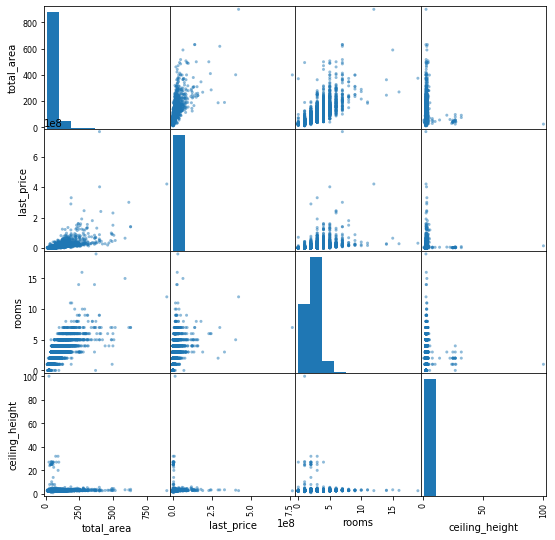

In [107]:
pd.plotting.scatter_matrix(data[['total_area','last_price','rooms','ceiling_height']], figsize=(9, 9))

#### 4.2 Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.

In [108]:
# сделаем срез выведем среднее и медианное значение с помощью метода describe()
data.query('days_exposition>0')['days_exposition'].describe()

count    20390.000000
mean       180.959196
std        219.814795
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квртиры продаются за 181 день, медианное значение 95 дней.

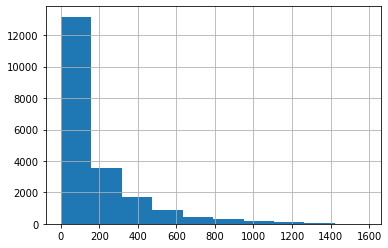

In [109]:
# построим гистограмму
data.query('days_exposition>0')['days_exposition'].hist()

#### 4.3 Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

По усам диаграмммы размаха можно определить самую быструю и самую долгую продажу. Все, что за пределами усов - выбросы.

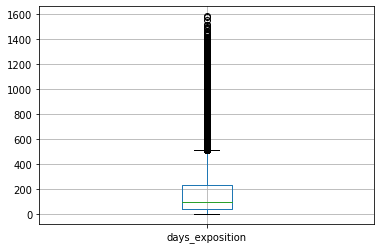

In [110]:
# построим диаграмму размаха
data.query('days_exposition>0').boxplot('days_exposition')

(0, 515)

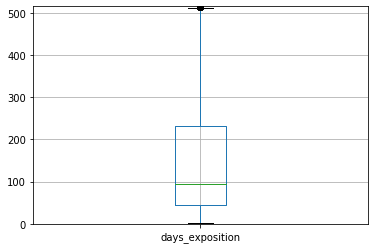

In [111]:
# построим диаграмму размаха
data.query('days_exposition>0').boxplot('days_exposition')
plt.ylim(0, 515)

Если левый «ус» длиннее минимума, то он заканчивается минимумом.
Итак, самая быстрая продажа это 1день.
Выясним самую долгую, рассчитывается как Q1 - 1.5*(Q3 - Q1)
Возьмем данные из ранее вызванного метода describe()

In [112]:
45+1.5*(232-45)

325.5

Самая долгая продажа на 326 день.

#### 4.4 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Посмотрим на цены недвижимости по количеству дней в продаже.

In [113]:
data.query('days_exposition<325')['last_price'].describe()

count    1.996500e+04
mean     6.277715e+06
std      1.038215e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.590000e+06
75%      6.600000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [114]:
data.query('days_exposition>325')['last_price'].describe()

count    3.538000e+03
mean     7.884126e+06
std      1.319990e+07
min      4.900000e+05
25%      3.500000e+06
50%      5.000000e+06
75%      8.000000e+06
max      4.013000e+08
Name: last_price, dtype: float64

Квартиры которые продавались дольше, цена такой недвижимости выше в среднем и по медианным значениям.

#### 4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2467b55e48>,
      dtype=object)

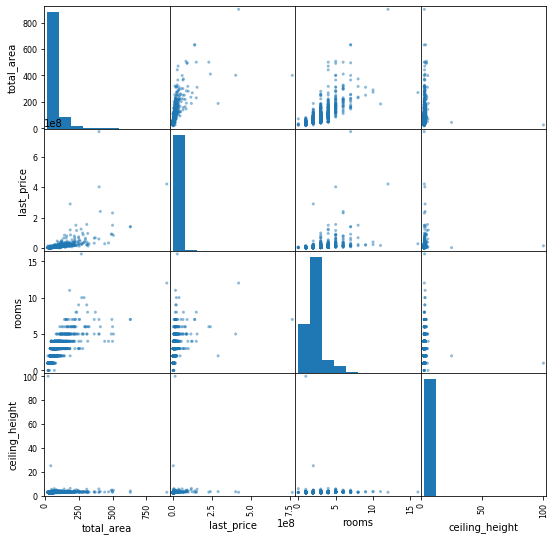

In [115]:
try_to_find_influence=data.query('floors_first_or_last!="другой" & cityCenters_nearest>0')[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(try_to_find_influence, figsize=(9, 9))

In [116]:
try_to_find_influence.corr().style.background_gradient(cmap='coolwarm')

,total_area,last_price,rooms,ceiling_height
total_area,1,0.633535,0.741201,0.0488586
last_price,0.633535,1,0.36833,0.0411011
rooms,0.741201,0.36833,1,0.0258317
ceiling_height,0.0488586,0.0411011,0.0258317,1


Чтобы установить зависимость стоимости жилья от факторов цена квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, необходимо рассматривать в рамках одной локации.

#### 4.5 Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [117]:
print('Проект Я.Недвижимость стартовал за',len(data.query('year==2014')['month'].unique()), 'месяца до конца 2014 года')
data.groupby('year')['year'].count()

Проект Я.Недвижимость стартовал за 2 месяца до конца 2014 года


year
2014     137
2015    1178
2016    2757
2017    8153
2018    8466
2019    2832
Name: year, dtype: int64

Из года в год  по 2018 количество пользователей портала Я.Недвижимости растет, люди все чаще размещают объявления на портале.
В 2019 небольшое количесво объявлений связано с тем, потому что в срезе данных объявления не за весь 2019.
Выясним до какого месяца, и сравним с предыдущими двумя годами.Проверим есть ли тенденция к снижению.

In [118]:
month_till=data.query('year==2019')['month'].unique()
print('Объявление в 2019 размещены за первые', len(month_till), 'месяцев, их количество',len(data.query('year==2019 & month in @month_till')))
print('Количество объявление в 2017 за первые', len(month_till), 'месяцев составило',len(data.query('year==2017 & month in @month_till')))
print('Количество объявление в 2018 за первые', len(month_till), 'месяцев составило',len(data.query('year==2018 & month in @month_till')))

Объявление в 2019 размещены за первые 5 месяцев, их количество 2832
Количество объявление в 2017 за первые 5 месяцев составило 2127
Количество объявление в 2018 за первые 5 месяцев составило 3395


В 2017 и 2018 примерно одинаковое количество размещенных объявлений, по результатам среза за первые 5 месяцев мы не можем утверждать о общем спаде. Можем лишь констатировать, что за этот же период в прошлом году было размещено на 563 объявления больше.

Выясним тенденцию размещения объявлений по месяцам за полные года,а это с 2015 по 2018 включительно.

In [119]:
data.query('2014<year<2019').groupby('month')['month'].count().sort_values(ascending = False)


month
11    2340
10    2107
2     2077
9     1971
6     1748
8     1738
3     1699
7     1683
12    1514
4     1406
5     1199
1     1072
Name: month, dtype: int64

Наибольший всплеск объявлений приходится на ноябрь, меньше всего в январе. 
Наибольшее количество объявлений размещены с сентября по ноябрь и в феврале.
Меньше всего приходятся на январь и март, остальные месяцы примерно с одинаковым количеством.

In [120]:
data.groupby('weekday')['weekday'].count().sort_values(ascending = False)

weekday
3    4262
1    4160
4    3979
2    3940
0    3586
5    1917
6    1679
Name: weekday, dtype: int64

Чаще всего объявления размещают в среду и вторник,меньше всего в воскресенье и субботу.
Остальные буднии дни примерно на одном уровне.

#### 4.6 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 

In [121]:
top10_most_count=data.groupby('locality_name')['year'].count().sort_values(ascending = False)[0:10]
top10_most_count

locality_name
САНКТ-ПЕТЕРБУРГ      15619
ПОСЕЛОК МУРИНО         552
ПОСЕЛОК ШУШАРЫ         436
ВСЕВОЛОЖСК             398
ПУШКИН                 369
КОЛПИНО                337
ПОСЕЛОК ПАРГОЛОВО      327
ГАТЧИНА                307
ДЕРЕВНЯ КУДРОВО        299
ВЫБОРГ                 237
Name: year, dtype: int64

Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
Эти данные можно найти по имени в столбце 'locality_name'.

In [122]:
# сохраним в список list_of_name_top10 индексы с наименованием населенных пунктов 
list_of_name_top10=top10_most_count.index.tolist()
# сделаем срез таблицы,по списку list_of_name_top10,сгруппируем данные по общей сумме м2, запишем в переменную top10_price_of_m2
top10_price_of_m2=data.query('locality_name in @list_of_name_top10').groupby('locality_name')['price_of_m2'].mean()
# сформируем таблицу из результата
top10_price_of_m2=pd.DataFrame(top10_price_of_m2)
# отобразим таблицу 
top10_price_of_m2

,price_of_m2
locality_name,
ВСЕВОЛОЖСК,68654.474874
ВЫБОРГ,58141.919831
ГАТЧИНА,68746.110749
ДЕРЕВНЯ КУДРОВО,92473.588629
КОЛПИНО,75402.492582
ПОСЕЛОК МУРИНО,85629.567029
ПОСЕЛОК ПАРГОЛОВО,90175.886850
ПОСЕЛОК ШУШАРЫ,78474.378440
ПУШКИН,103125.818428


In [123]:
top10_most_count=pd.DataFrame(top10_most_count)
top10_most_count=top10_most_count.merge(top10_price_of_m2,on='locality_name')

In [124]:
# сортировка по убыванию
top10_most_count=top10_most_count.sort_values(by='price_of_m2', ascending = False)
# колонке присвоим правильное наименование
top10_most_count.rename(columns={'year': 'count_of_ad','price_of_m2':'mean_price_of_m2'}, inplace=True)
top10_most_count

,count_of_ad,mean_price_of_m2
locality_name,,
САНКТ-ПЕТЕРБУРГ,15619,114698.219540
ПУШКИН,369,103125.818428
ДЕРЕВНЯ КУДРОВО,299,92473.588629
ПОСЕЛОК ПАРГОЛОВО,327,90175.886850
ПОСЕЛОК МУРИНО,552,85629.567029
ПОСЕЛОК ШУШАРЫ,436,78474.378440
КОЛПИНО,337,75402.492582
ГАТЧИНА,307,68746.110749
ВСЕВОЛОЖСК,398,68654.474874


Санкт-Петербург лидирует по количеству предложений и стоимости м2.
Замыкает 10ку Выборг.

#### 4.7 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. 

Сделаем срез данных по г.САНКТ-ПЕТЕРБУРГ сохраним в переменную piter

In [125]:
piter=data.query('locality_name=="САНКТ-ПЕТЕРБУРГ" & cityCenters_nearest>0')[['cityCenters_nearest','price_of_m2']]

In [126]:
# сформируем таблицу
piter=pd.DataFrame(piter)
# выведем на экран
piter

,cityCenters_nearest,price_of_m2
0,16028,120370.0
2,13933,92786.0
3,6800,408176.0
4,8098,100000.0
7,11634,110545.0
...,...,...
23513,16081,100567.0
23514,6263,105769.0
23515,4489,129904.0
23518,4232,72491.0


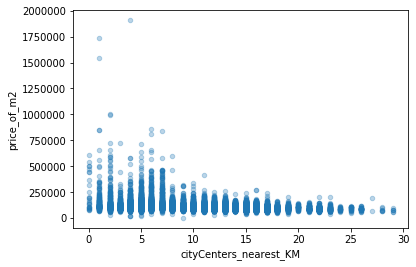

In [127]:
# добавим столбец cityCenters_nearest_KM со значениями cityCenters_nearest в км, округлим до целого
piter['cityCenters_nearest_KM']=(piter['cityCenters_nearest']/1000).round()
# удалим лишний столбец
del piter['cityCenters_nearest']
# построим график удаленность от цены за м2
piter.plot(x='cityCenters_nearest_KM', y='price_of_m2', kind='scatter',alpha=0.3)


Даже поэтому графику заметно, что чем дальше от центра тем цена ниже и разброс цен меньше.

In [128]:
# рассчитаем коэффициент Пирсона
print('Коэффициент Пирсона равен:',piter['cityCenters_nearest_KM'].corr(piter['price_of_m2']))

Коэффициент Пирсона равен: -0.313346793887771


Корреляция есть,она отрицательная, но не явная. 
Построем график: он должен показывать, как цена зависит от удалённости от центра.

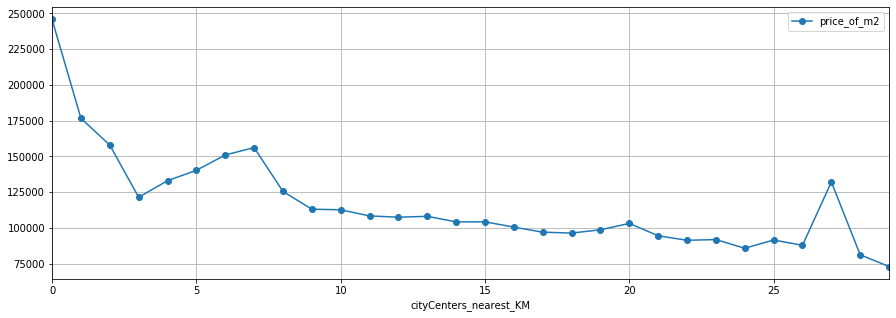

In [129]:
# сделаем сводную по удаленности от центра и средней величины за м2
piter_pivot=piter.pivot_table(index='cityCenters_nearest_KM', values='price_of_m2', aggfunc='mean')
# построим график
piter_pivot.plot(grid=True, style='o-',figsize=(15, 5))

Поставим диапазон до 15км.

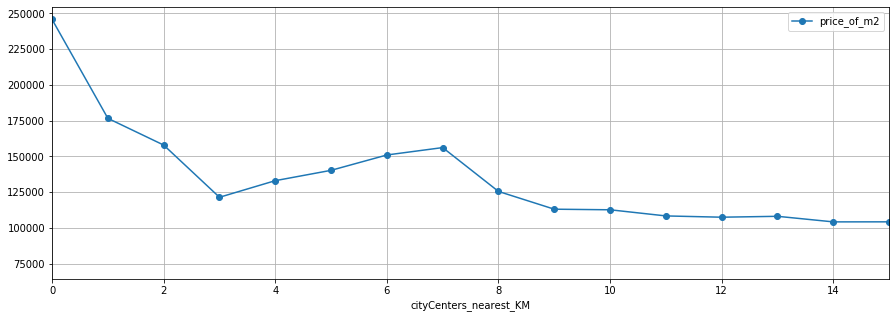

In [130]:
piter_pivot.plot(grid=True, style='o-',figsize=(15, 5), xlim=(0,15))

На графике видно, что чем ближе к центру,тем цена выше. 
Также ,что после 7км от центра, идет только спад по стоимости м2, значит до 7км это и есть центральная зона.

#### 4.8 Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24674bb518>,
      dtype=object)

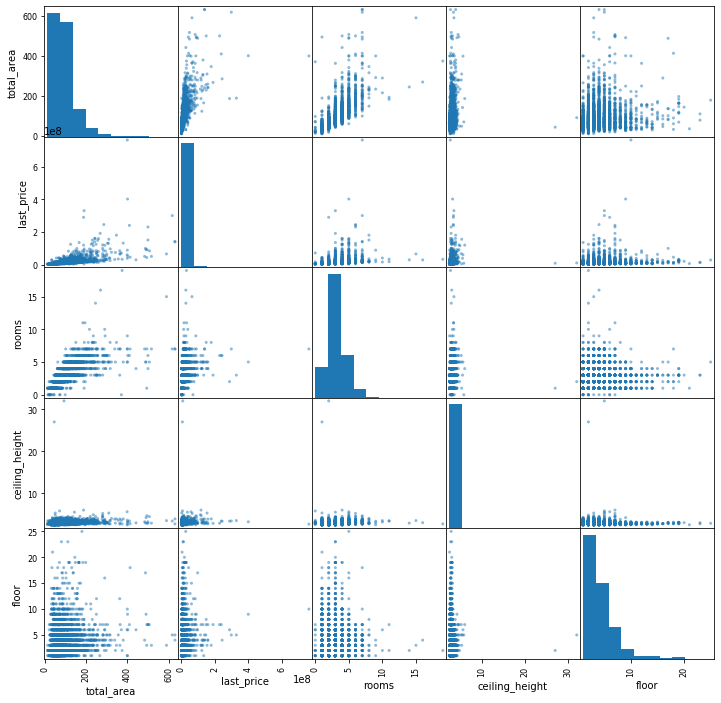

In [131]:
piter_center=data.query('cityCenters_nearest<7000 & locality_name=="САНКТ-ПЕТЕРБУРГ"')[['total_area','last_price','rooms','ceiling_height','floor']]
pd.plotting.scatter_matrix(piter_center, figsize=(12, 12))

In [132]:
piter_center.corr().style.background_gradient(cmap='coolwarm')

,total_area,last_price,rooms,ceiling_height,floor
total_area,1,0.607733,0.727439,0.129873,0.110375
last_price,0.607733,1,0.309531,0.0761381,0.122738
rooms,0.727439,0.309531,1,0.0923798,-0.0306793
ceiling_height,0.129873,0.0761381,0.0923798,1,-0.0673319
floor,0.110375,0.122738,-0.0306793,-0.0673319,1


Цены на недвижимость имеют положительную корреляцию от площади, в свою очередь площадь от количества комнат.
Остальные зависимости нейтральные, т.е.их нет. Высота потолков не влияет ни на что.

### Шаг 5. Общий вывод

Выгрузка предоставлена с большим количеством пропусков, 60% времени ушло на заполнение их.
Необходимо сообщить об этом программистам Я.Недвижимости. Надо реализовать возможность поддтягивания данных о доме из кадастра. Вариант установки "заглушек по полям" для пользователей, упростит задачу для обработки пропусков и неверных значений. Например,  не дать возможности для ввода величин не придусмотреные данной категории дома(высота потолков, этажность, максимальная площадь и т.д.),при условии реализации подтягивания данных из кадастра.

Вне зависимости от населенного пункта на цену недвижимости влияет размер её площади.
Тем не менее, локация - главный фактор стоимости жилья. 
Стоимость м2 в Санкт-Петербурге самая выскоя и м.б. в несколько раз выше, чем на перефирии.
Чем ближе недвижимость к центру города, тем выше цена. 
Для Санкт-Петербурга центр города определен радиусом в 7км, стоимость жилья в этом районе отличается высоким ценовым показателем. Разброс цен за 7км менее заметен.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод